## Neural Network Project Part IV

In [74]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import seaborn as sns
import tensorflow 
import warnings
import os
warnings.filterwarnings('ignore')

In [76]:
import h5py
Data = h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

Data.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [77]:
X_train = Data['X_train'][:]
y_train = Data['y_train'][:]
X_test = Data['X_test'][:]
y_test = Data['y_test'][:]

In [78]:
X_train.shape

(42000, 32, 32)

In [79]:
X_test.shape

(18000, 32, 32)

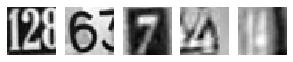

Label for each of the above image: [2 6 7 4 4]


In [80]:
# visualizing the first 5 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 1))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('Label for each of the above image: %s' % (y_train[0:5]))

In [81]:
X_train = X_train.reshape(X_train.shape[0], 1024, 1)
X_test = X_test.reshape(X_test.shape[0], 1024, 1)

# # normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

print('Resized Training set', X_train.shape, y_train.shape)
print('Resized Test set', X_test.shape, y_test.shape)

Resized Training set (42000, 1024, 1) (42000,)
Resized Test set (18000, 1024, 1) (18000,)


In [82]:
from tensorflow.keras.utils import to_categorical
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# no.of classes
n = y_test.shape[1] 
print("The number of classes in this dataset are:",n)

The number of classes in this dataset are: 10


In [83]:
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# create model
model = Sequential()  
model.add(Flatten())
model.add(Dense(256, activation='relu')) ###Multiple Dense units with Relu activation
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(n, activation='softmax'))
   

In [84]:
sgd = optimizers.Adam(lr=1e-3)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [85]:
training_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=200, verbose=2)

Train on 42000 samples, validate on 18000 samples
Epoch 1/5
 - 3s - loss: 2.2721 - acc: 0.1284 - val_loss: 2.1479 - val_acc: 0.1983
Epoch 2/5
 - 2s - loss: 1.8418 - acc: 0.3356 - val_loss: 1.6320 - val_acc: 0.4308
Epoch 3/5
 - 2s - loss: 1.5127 - acc: 0.4960 - val_loss: 1.3615 - val_acc: 0.5618
Epoch 4/5
 - 3s - loss: 1.3100 - acc: 0.5772 - val_loss: 1.2137 - val_acc: 0.6165
Epoch 5/5
 - 3s - loss: 1.2179 - acc: 0.6114 - val_loss: 1.1752 - val_acc: 0.6315


In [86]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 1.1751616054111056
Accuracy: 0.6315


Text(0.5, 1.0, 'Training and validation loss')

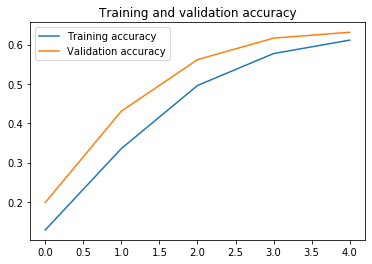

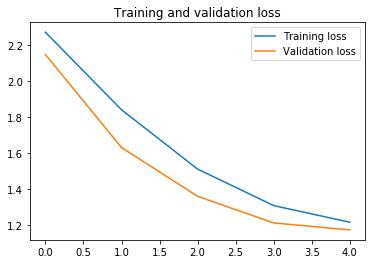

In [87]:
accuracy = training_history.history['acc']
val_accuracy  = training_history.history['val_acc']
loss     = training_history.history['loss']
val_loss = training_history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  ( epochs, accuracy, label = 'Training accuracy' )
plt.plot  ( epochs, val_accuracy, label = 'Validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend(loc = 'Lower right')
plt.figure()

plt.plot  ( epochs, loss, label = 'Training loss' )
plt.plot  ( epochs, val_loss, label = 'Validation loss' )
plt.legend(loc = 'Upper right')
plt.title ('Training and validation loss'   )

In [88]:
X_train1 = Data['X_train'][:]
y_train1 = Data['y_train'][:]
X_test1 = Data['X_test'][:]
y_test1 = Data['y_test'][:]

In [89]:
X_train1.shape[0]

42000

In [90]:
X_train1.shape[1]

32

In [91]:
X_train1.shape[2]

32

In [92]:
X_train1 = X_train1.reshape(X_train.shape[0], 1024)
X_test1 = X_test1.reshape(X_test.shape[0], 1024)

# # normalize inputs from 0-255 to 0-1
X_train1 = X_train1 / 255.0
X_test1 = X_test1 / 255.0

print('Resized Training set', X_train1.shape, y_train1.shape)
print('Resized Test set', X_test1.shape, y_test1.shape)
from tensorflow.keras.utils import to_categorical
# one hot encode outputs
y_train1 = to_categorical(y_train1)
y_test1 = to_categorical(y_test1)

# no.of classes
n = y_test1.shape[1] 
print("The number of classes in this dataset are:",n)

Resized Training set (42000, 1024) (42000,)
Resized Test set (18000, 1024) (18000,)
The number of classes in this dataset are: 10


In [93]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense,Activation, ReLU
from tensorflow.keras.models import Sequential # Forward prop
from tensorflow.keras import regularizers, optimizers
def mlp_model():
    model_dropout = Sequential()
    
    
    model_dropout.add(Dense(1024, input_dim=1024, kernel_initializer='he_normal'))
    model_dropout.add(BatchNormalization())
    model_dropout.add(Activation('sigmoid'))
    model_dropout.add(Dense(50, kernel_initializer='he_normal'))
    model_dropout.add(BatchNormalization())
    model_dropout.add(Activation('sigmoid'))    
    model_dropout.add(Dense(50, kernel_initializer='he_normal'))
    model_dropout.add(BatchNormalization())
    model_dropout.add(Activation('sigmoid'))
    model_dropout.add(Dense(50, kernel_initializer='he_normal'))
    model_dropout.add(BatchNormalization())
    model_dropout.add(Activation('relu'))
    model_dropout.add(Dropout(0.2))
    model_dropout.add(Dense(10, kernel_initializer='he_normal'))
    model_dropout.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model_dropout.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model_dropout

In [ ]:
model_drp = mlp_model()
history = model_drp.fit(X_train1, y_train1, validation_data=(X_test1, y_test1),epochs = 50, verbose = 1)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 31s 738us/sample - loss: 1.6196 - acc: 0.4678 - val_loss: 1.4174 - val_acc: 0.5483
Epoch 2/10
42000/42000 [==============================] - 30s 710us/sample - loss: 1.2502 - acc: 0.6055 - val_loss: 1.2363 - val_acc: 0.5987
Epoch 3/10
42000/42000 [==============================] - 29s 690us/sample - loss: 1.1510 - acc: 0.6374 - val_loss: 1.6975 - val_acc: 0.4851
Epoch 4/10
42000/42000 [==============================] - 29s 687us/sample - loss: 1.0883 - acc: 0.6575 - val_loss: 0.9509 - val_acc: 0.7057
Epoch 5/10
42000/42000 [==============================] - 29s 692us/sample - loss: 1.0320 - acc: 0.6756 - val_loss: 1.1983 - val_acc: 0.6108
Epoch 6/10
42000/42000 [==============================] - 29s 695us/sample - loss: 0.9768 - acc: 0.6917 - val_loss: 1.0797 - val_acc: 0.6576
Epoch 7/10
42000/42000 [==============================] - 29s 689us/sample - loss: 0.9502 - acc: 0.7017 

In [ ]:
results = model_drp.evaluate(X_test1, y_test1)

In [ ]:
train_results = model_drp.evaluate(X_train1, y_train1)

In [ ]:
print('Test accuracy: ', results[1])
print("Loss:", results[0])

In [ ]:
model_hist = history
accuracy      = model_hist.history['acc']
val_accuracy  = model_hist.history['val_acc']
loss     = model_hist.history['loss']
val_loss = model_hist.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  ( epochs, accuracy, label = 'training accuracy' )
plt.plot  ( epochs, val_accuracy, label = 'validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  ( epochs, loss, label = 'training loss' )
plt.plot  ( epochs, val_loss, label = 'validation loss' )
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss'   )